## We now try to utilize the time data to be able to find anomolies

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Data/unscaled_processed_airdata.csv')
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date_Time,Hour,Day,weekday
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,18,10,2
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,19,10,2
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,20,10,2
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00,21,10,2
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00,22,10,2


## We will preprocess hour into hour sin and hour cos

In [4]:
df['hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date_Time,Hour,Day,weekday,hour_sin,hour_cos
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,18,10,2,-1.000000,-1.836970e-16
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,19,10,2,-0.965926,2.588190e-01
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,20,10,2,-0.866025,5.000000e-01
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00,21,10,2,-0.707107,7.071068e-01
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00,22,10,2,-0.500000,8.660254e-01


### Repeating this strategy for day and weekday

In [5]:
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)

In [6]:
df['day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)

In [7]:
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,...,Date_Time,Hour,Day,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos,day_sin,day_cos
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,...,2004-03-10 18:00:00,18,10,2,-1.000000,-1.836970e-16,0.974928,-0.222521,0.897805,-0.440394
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,...,2004-03-10 19:00:00,19,10,2,-0.965926,2.588190e-01,0.974928,-0.222521,0.897805,-0.440394
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,...,2004-03-10 20:00:00,20,10,2,-0.866025,5.000000e-01,0.974928,-0.222521,0.897805,-0.440394
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,...,2004-03-10 21:00:00,21,10,2,-0.707107,7.071068e-01,0.974928,-0.222521,0.897805,-0.440394
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,...,2004-03-10 22:00:00,22,10,2,-0.500000,8.660254e-01,0.974928,-0.222521,0.897805,-0.440394


## Using isolation forest now

In [8]:
df_final = df.drop(columns=['Hour', 'Day', 'weekday', 'Date_Time'])

df_final.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,hour_sin,hour_cos,weekday_sin,weekday_cos,day_sin,day_cos
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,-1.000000,-1.836970e-16,0.974928,-0.222521,0.897805,-0.440394
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,-0.965926,2.588190e-01,0.974928,-0.222521,0.897805,-0.440394
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,-0.866025,5.000000e-01,0.974928,-0.222521,0.897805,-0.440394
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,-0.707107,7.071068e-01,0.974928,-0.222521,0.897805,-0.440394
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,-0.500000,8.660254e-01,0.974928,-0.222521,0.897805,-0.440394


In [9]:
from sklearn.ensemble import IsolationForest

# Initialize with random state for reproducibility
forest = IsolationForest(contamination=0.01, random_state=42)

In [10]:
# Fit model and get predictions (-1 for anomaly, 1 for normal)
predictions = forest.fit_predict(df_final)

# Get anomaly scores (lower/more negative = more anomalous)
anomaly_scores = forest.score_samples(df_final)

# Store both in df (which has Date_Time for visualization)
df['Anomaly'] = predictions
df['Anomaly_Score'] = anomaly_scores

# Filter anomalies
anomalies = df[df['Anomaly'] == -1]

print(f"Total samples: {len(df)}")
print(f"Anomalies detected: {len(anomalies)} ({len(anomalies)/len(df)*100:.2f}%)")
print(f"Normal instances: {sum(df['Anomaly']==1)}")

Total samples: 9357
Anomalies detected: 94 (1.00%)
Normal instances: 9263


In [11]:
# Show anomaly score statistics
print(f"\nAnomaly Score Statistics:")
print(f"  Range: {anomaly_scores.min():.4f} to {anomaly_scores.max():.4f}")
print(f"  Mean: {anomaly_scores.mean():.4f}")
print(f"  Threshold (1st percentile): {np.percentile(anomaly_scores, 1):.4f}")
print(f"\nAnomalies have scores below: {df[df['Anomaly']==-1]['Anomaly_Score'].max():.4f}")


Anomaly Score Statistics:
  Range: -0.6778 to -0.4269
  Mean: -0.4849
  Threshold (1st percentile): -0.5977

Anomalies have scores below: -0.5980


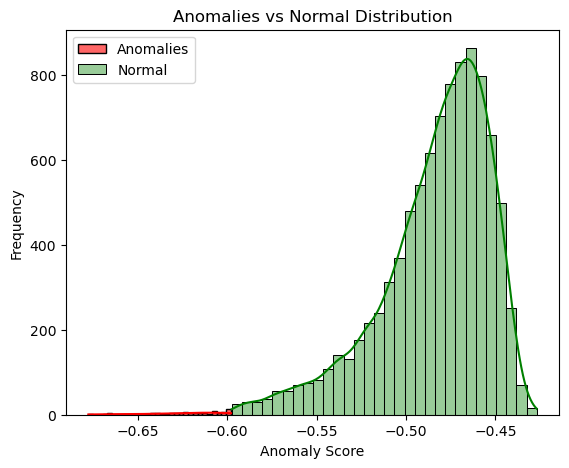

In [12]:
# Distribution of anomaly scores
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
sns.histplot(df[df['Anomaly']==-1]['Anomaly_Score'], bins=30, kde=True, color='red', alpha=0.6, label='Anomalies')
sns.histplot(df[df['Anomaly']==1]['Anomaly_Score'], bins=30, kde=True, color='green', alpha=0.4, label='Normal')
plt.title('Anomalies vs Normal Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()

plt.show()

## Integration of SHAP

In [13]:
import shap

# Create SHAP explainer for the Isolation Forest model
explainer = shap.Explainer(forest)

# Calculate SHAP values for all data
shap_vals = explainer(df_final)

print(f"SHAP values shape: {shap_vals.shape}")
print(f"Features analyzed: {list(df_final.columns)}")

SHAP values shape: (9357, 18)
Features analyzed: ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos', 'day_sin', 'day_cos']


### Overall Feature Importance (All Data)

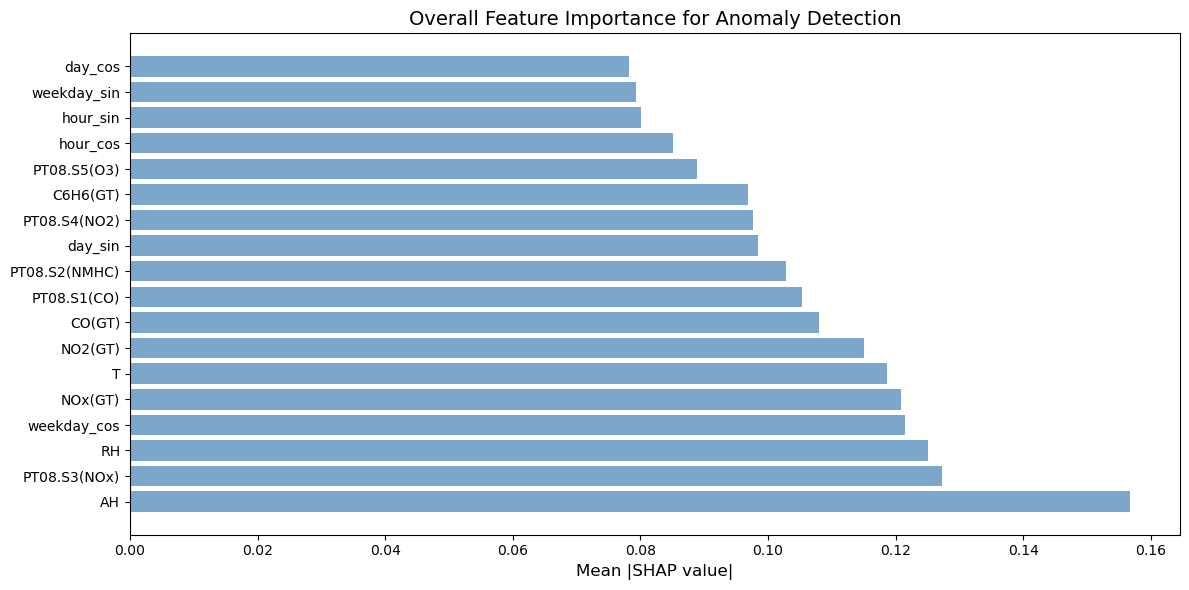


Top 5 Most Important Features:
  1. AH: 0.1567
  2. PT08.S3(NOx): 0.1273
  3. RH: 0.1251
  4. weekday_cos: 0.1214
  5. NOx(GT): 0.1208


In [14]:
# Calculate mean absolute SHAP values for feature importance
features = df_final.columns
mean_shap_abs = np.abs(shap_vals.values).mean(axis=0)

plt.figure(figsize=(12, 6))
sorted_idx = np.argsort(mean_shap_abs)[::-1]
plt.barh(range(len(features)), mean_shap_abs[sorted_idx], color='steelblue', alpha=0.7)
plt.yticks(range(len(features)), [features[i] for i in sorted_idx])
plt.xlabel('Mean |SHAP value|', fontsize=12)
plt.title('Overall Feature Importance for Anomaly Detection', fontsize=14)
plt.tight_layout()
plt.show()

# Print top features
print("\nTop 5 Most Important Features:")
for i in range(min(5, len(features))):
    print(f"  {i+1}. {features[sorted_idx[i]]}: {mean_shap_abs[sorted_idx[i]]:.4f}")

### Feature Importance: Anomalies vs Normal Instances

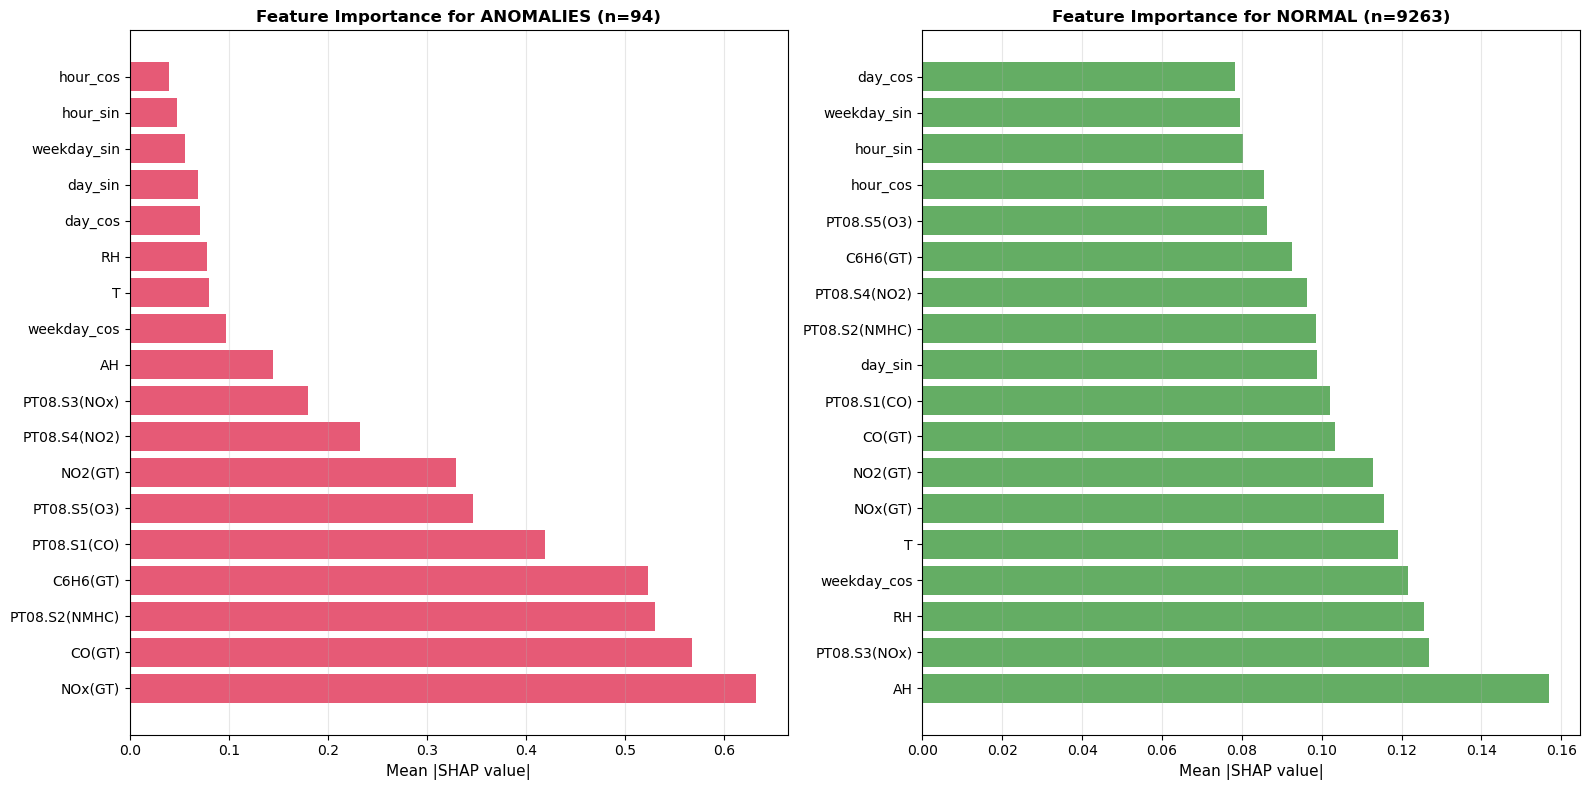


TOP 5 FEATURES DRIVING ANOMALIES:
  1. NOx(GT)             : 0.6328
  2. CO(GT)              : 0.5682
  3. PT08.S2(NMHC)       : 0.5306
  4. C6H6(GT)            : 0.5237
  5. PT08.S1(CO)         : 0.4189


In [15]:
# Separate SHAP values for anomalies vs normal
anomaly_mask = df['Anomaly'] == -1
normal_mask = df['Anomaly'] == 1

anomaly_shap_mean = np.abs(shap_vals.values[anomaly_mask]).mean(axis=0)
normal_shap_mean = np.abs(shap_vals.values[normal_mask]).mean(axis=0)

feature_names = list(df_final.columns)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Anomalies
sorted_idx_anom = np.argsort(anomaly_shap_mean)[::-1]
axes[0].barh(range(len(feature_names)), anomaly_shap_mean[sorted_idx_anom], color='crimson', alpha=0.7)
axes[0].set_yticks(range(len(feature_names)))
axes[0].set_yticklabels([feature_names[i] for i in sorted_idx_anom])
axes[0].set_xlabel('Mean |SHAP value|', fontsize=11)
axes[0].set_title(f'Feature Importance for ANOMALIES (n={sum(anomaly_mask)})', fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Normal
sorted_idx_norm = np.argsort(normal_shap_mean)[::-1]
axes[1].barh(range(len(feature_names)), normal_shap_mean[sorted_idx_norm], color='forestgreen', alpha=0.7)
axes[1].set_yticks(range(len(feature_names)))
axes[1].set_yticklabels([feature_names[i] for i in sorted_idx_norm])
axes[1].set_xlabel('Mean |SHAP value|', fontsize=11)
axes[1].set_title(f'Feature Importance for NORMAL (n={sum(normal_mask)})', fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("TOP 5 FEATURES DRIVING ANOMALIES:")
print("="*60)
for i in range(min(5, len(feature_names))):
    feat = feature_names[sorted_idx_anom[i]]
    val = anomaly_shap_mean[sorted_idx_anom[i]]
    print(f"  {i+1}. {feat:20s}: {val:.4f}")

### Individual Instance Analysis: Waterfall Plots

In [16]:
# Get indices
anomaly_indices = df[df['Anomaly'] == -1].index
normal_indices = df[df['Anomaly'] == 1].index

# Find the MOST anomalous instance (lowest score)
most_anomalous_idx = df[df['Anomaly'] == -1]['Anomaly_Score'].idxmin()
most_normal_idx = df[df['Anomaly'] == 1]['Anomaly_Score'].idxmax()

print(f"Most anomalous instance: index {most_anomalous_idx}, score: {df.loc[most_anomalous_idx, 'Anomaly_Score']:.4f}")
print(f"Most normal instance: index {most_normal_idx}, score: {df.loc[most_normal_idx, 'Anomaly_Score']:.4f}")

Most anomalous instance: index 6192, score: -0.6778
Most normal instance: index 502, score: -0.4269



SHAP Explanation for MOST ANOMALOUS instance (index 6192):


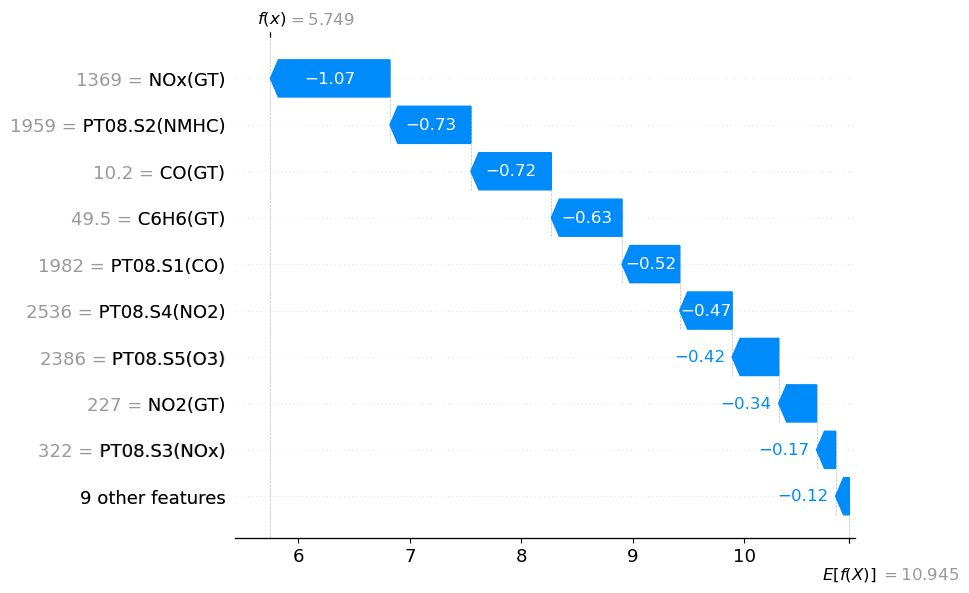

In [17]:
# Waterfall plot for most anomalous instance
print(f"\nSHAP Explanation for MOST ANOMALOUS instance (index {most_anomalous_idx}):")
anomaly_shap = explainer(df_final.iloc[[most_anomalous_idx]])
shap.waterfall_plot(anomaly_shap[0])

In [18]:
df_final.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,hour_sin,hour_cos,weekday_sin,weekday_cos,day_sin,day_cos
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9.357000e+03,9.357000e+03,9357.000000,9357.000000,9.357000e+03,9357.000000
mean,2.130603,1103.059741,10.179155,942.142620,241.922197,832.758897,109.632094,1453.298814,1032.544298,18.233408,49.191386,1.019621,2.713539e-04,1.566662e-04,-0.003881,-0.002133,-1.305843e-02,-0.019373
std,1.431736,218.196346,7.503812,267.866611,204.315075,255.709833,46.462311,343.206131,404.447613,8.781791,17.194506,0.402203,7.070929e-01,7.071962e-01,0.706659,0.707616,7.089328e-01,0.704965
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,-1.000000e+00,-1.000000e+00,-0.974928,-0.900969,-9.987165e-01,-0.994869
25%,1.100000,938.000000,4.500000,736.000000,96.000000,654.000000,76.000000,1227.000000,733.000000,11.700000,35.800000,0.732300,-7.071068e-01,-7.071068e-01,-0.781831,-0.900969,-7.247928e-01,-0.758758
50%,1.800000,1067.000000,8.300000,910.012987,180.000000,804.000000,104.917526,1460.000000,970.000000,17.600000,49.600000,0.989500,1.224647e-16,6.123234e-17,0.000000,-0.222521,-2.449294e-16,-0.050649
75%,2.900000,1239.000000,14.100000,1119.000000,326.000000,968.000000,136.314685,1668.000000,1293.000000,24.300000,62.300000,1.306700,7.071068e-01,7.071068e-01,0.781831,0.623490,7.247928e-01,0.688967
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,1.000000e+00,1.000000e+00,0.974928,1.000000,9.987165e-01,1.000000



SHAP Explanation for MOST NORMAL instance (index 502):


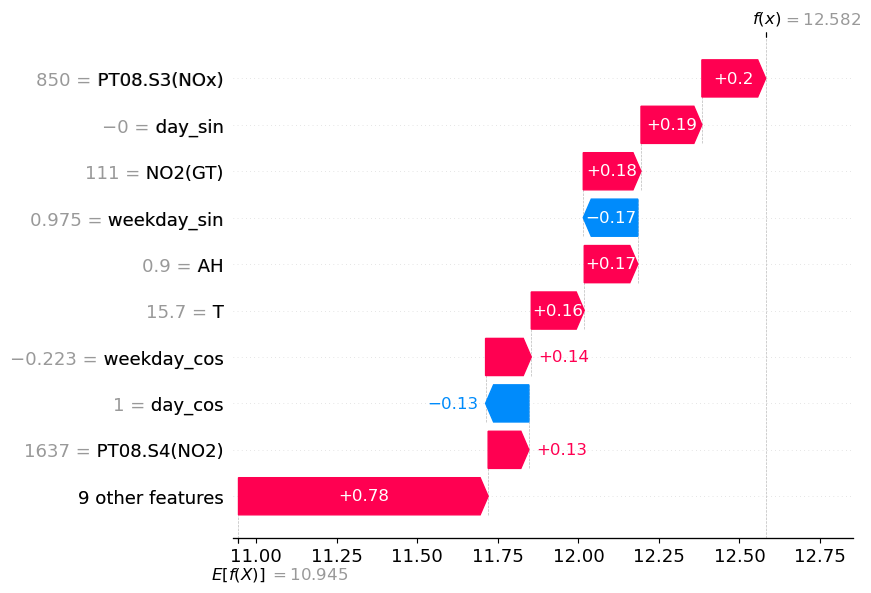

In [19]:
# Waterfall plot for most normal instance
print(f"\nSHAP Explanation for MOST NORMAL instance (index {most_normal_idx}):")
normal_shap = explainer(df_final.iloc[[most_normal_idx]])
shap.waterfall_plot(normal_shap[0])

### SHAP Summary Plots

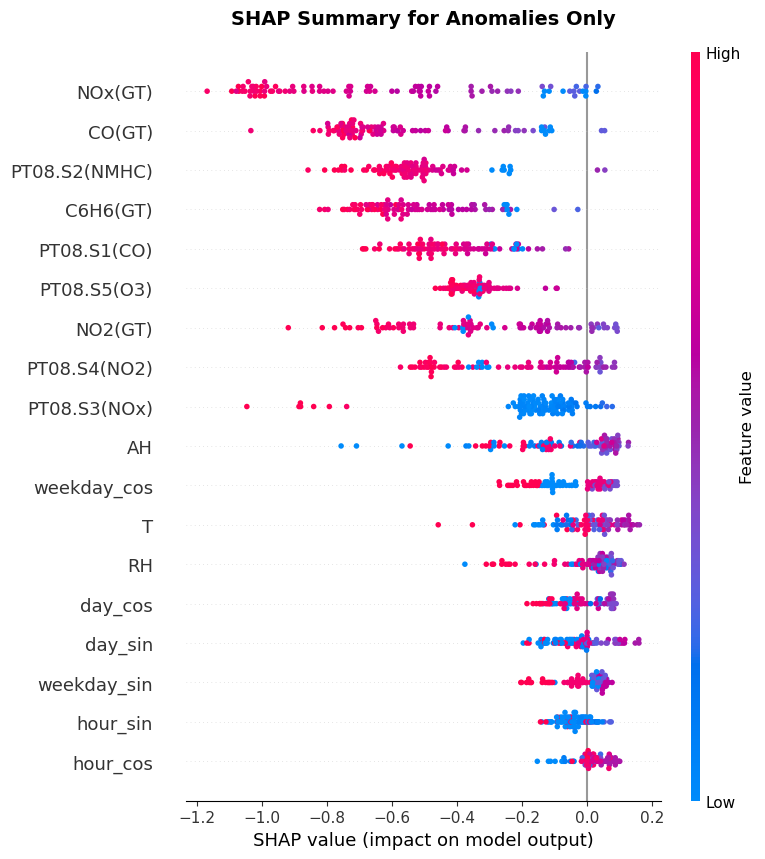

In [20]:
# SHAP summary plot for anomalies only
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_vals.values[anomaly_mask], df_final.loc[anomaly_mask], show=False)
plt.title('SHAP Summary for Anomalies Only', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

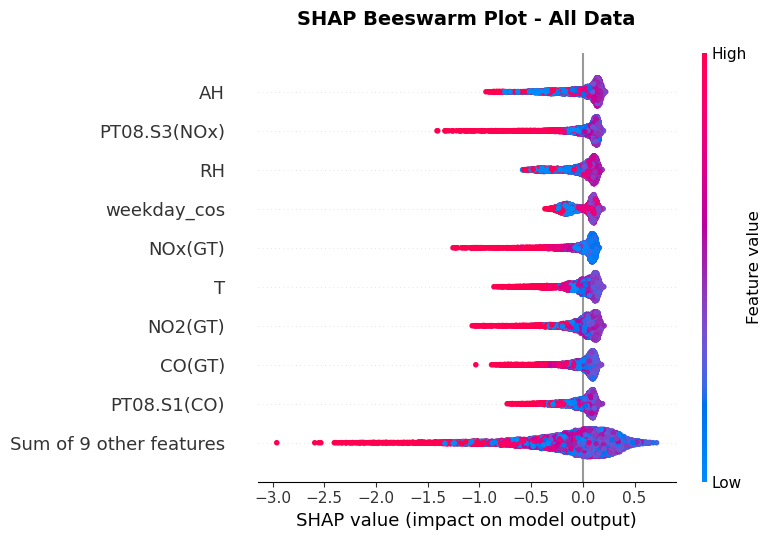

In [21]:
# SHAP beeswarm plot for all data
plt.figure(figsize=(10, 8))
shap.plots.beeswarm(shap_vals, show=False)
plt.title('SHAP Beeswarm Plot - All Data', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### Feature Difference Analysis: What Makes Anomalies Different?

In [22]:
# Summary of findings
print("\n" + "="*70)
print("ANOMALY DETECTION SUMMARY")
print("="*70)
print(f"\nDataset Statistics:")
print(f"   Total instances: {len(df)}")
print(f"   Anomalies: {sum(df['Anomaly']==-1)} ({sum(df['Anomaly']==-1)/len(df)*100:.2f}%)")
print(f"   Normal: {sum(df['Anomaly']==1)} ({sum(df['Anomaly']==1)/len(df)*100:.2f}%)")

print(f"\nAnomaly Scores:")
print(f"   Range: [{df['Anomaly_Score'].min():.4f}, {df['Anomaly_Score'].max():.4f}]")
print(f"   Anomaly threshold: {df[df['Anomaly']==-1]['Anomaly_Score'].max():.4f}")
print(f"   Mean anomaly score: {df[df['Anomaly']==-1]['Anomaly_Score'].mean():.4f}")
print(f"   Mean normal score: {df[df['Anomaly']==1]['Anomaly_Score'].mean():.4f}")

print(f"\ntop 3 Features Causing Anomalies:")
for i in range(min(3, len(feature_names))):
    feat = feature_names[sorted_idx_anom[i]]
    val = anomaly_shap_mean[sorted_idx_anom[i]]
    print(f"   {i+1}. {feat}: {val:.4f}")

print("\n" + "="*70)


ANOMALY DETECTION SUMMARY

Dataset Statistics:
   Total instances: 9357
   Anomalies: 94 (1.00%)
   Normal: 9263 (99.00%)

Anomaly Scores:
   Range: [-0.6778, -0.4269]
   Anomaly threshold: -0.5980
   Mean anomaly score: -0.6236
   Mean normal score: -0.4835

top 3 Features Causing Anomalies:
   1. NOx(GT): 0.6328
   2. CO(GT): 0.5682
   3. PT08.S2(NMHC): 0.5306



### Summary Statistics

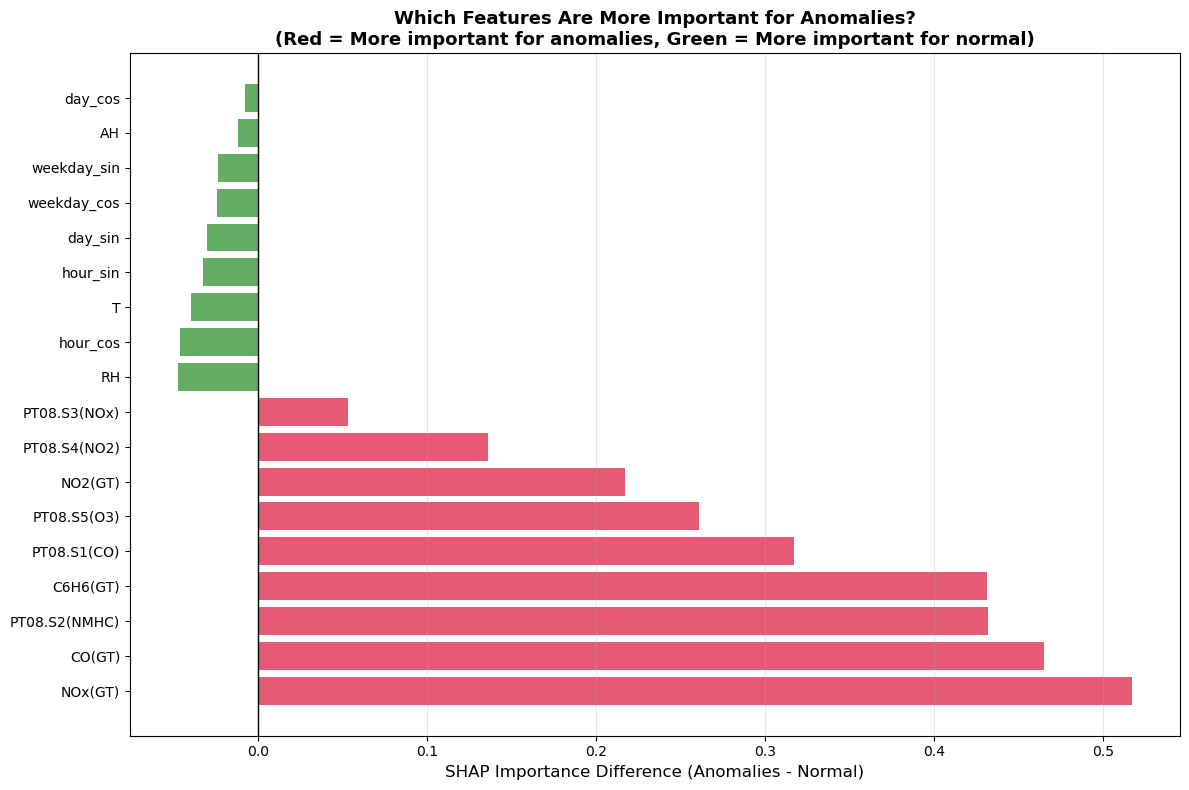


FEATURES MOST DISTINCTIVELY IMPORTANT FOR ANOMALIES:
  1. NOx(GT)             : Diff=+0.5172 (Anom=0.6328, Normal=0.1156)
  2. CO(GT)              : Diff=+0.4649 (Anom=0.5682, Normal=0.1033)
  3. PT08.S2(NMHC)       : Diff=+0.4321 (Anom=0.5306, Normal=0.0985)
  4. C6H6(GT)            : Diff=+0.4313 (Anom=0.5237, Normal=0.0925)
  5. PT08.S1(CO)         : Diff=+0.3168 (Anom=0.4189, Normal=0.1021)


In [23]:
# Calculate the difference in SHAP importance between anomalies and normal
anomaly_mask = df['Anomaly'] == -1
normal_mask = df['Anomaly'] == 1

anomaly_shap_mean = np.abs(shap_vals.values[anomaly_mask]).mean(axis=0)
normal_shap_mean = np.abs(shap_vals.values[normal_mask]).mean(axis=0)

# Difference: positive means more important for anomalies
shap_difference = anomaly_shap_mean - normal_shap_mean
feature_names = list(df_final.columns)

# Sort by absolute difference
sorted_idx = np.argsort(np.abs(shap_difference))[::-1]

plt.figure(figsize=(12, 8))
colors = ['crimson' if x > 0 else 'forestgreen' for x in shap_difference[sorted_idx]]
plt.barh(range(len(feature_names)), shap_difference[sorted_idx], color=colors, alpha=0.7)
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_idx])
plt.xlabel('SHAP Importance Difference (Anomalies - Normal)', fontsize=12)
plt.title('Which Features Are More Important for Anomalies?\n(Red = More important for anomalies, Green = More important for normal)', 
          fontsize=13, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("FEATURES MOST DISTINCTIVELY IMPORTANT FOR ANOMALIES:")
print("="*70)
for i in range(min(5, len(feature_names))):
    feat = feature_names[sorted_idx[i]]
    diff = shap_difference[sorted_idx[i]]
    anom_val = anomaly_shap_mean[sorted_idx[i]]
    norm_val = normal_shap_mean[sorted_idx[i]]
    print(f"  {i+1}. {feat:20s}: Diff={diff:+.4f} (Anom={anom_val:.4f}, Normal={norm_val:.4f})")

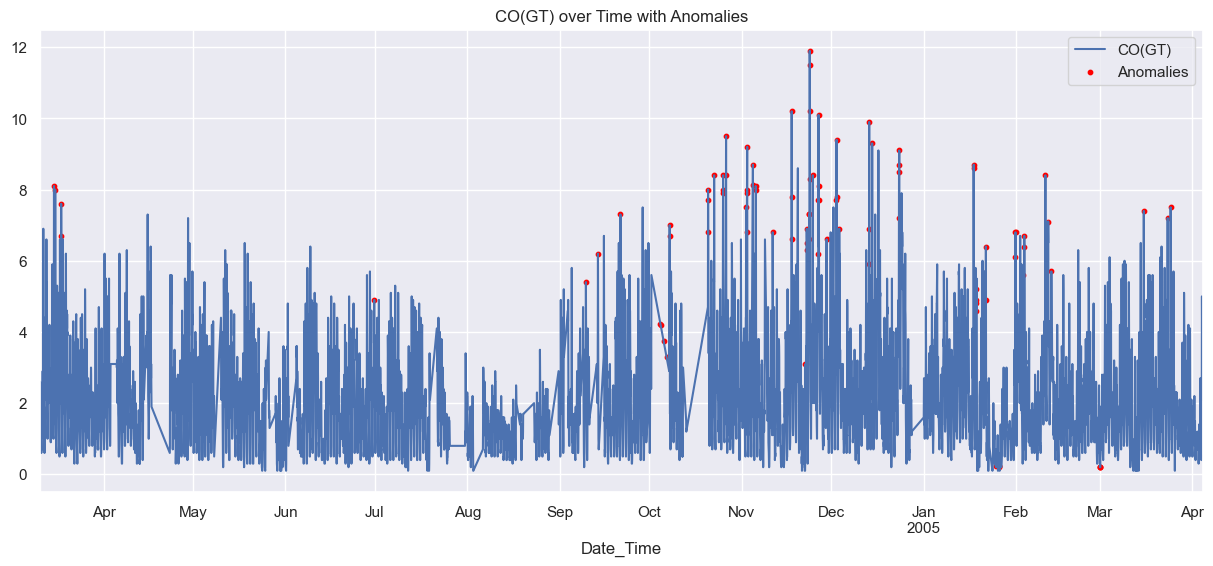

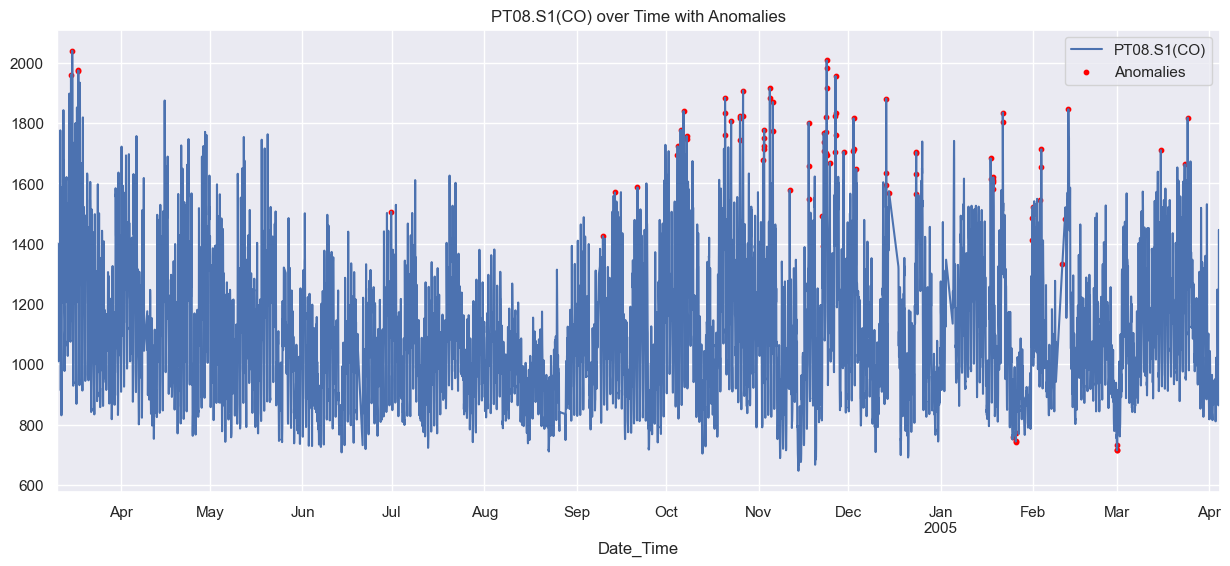

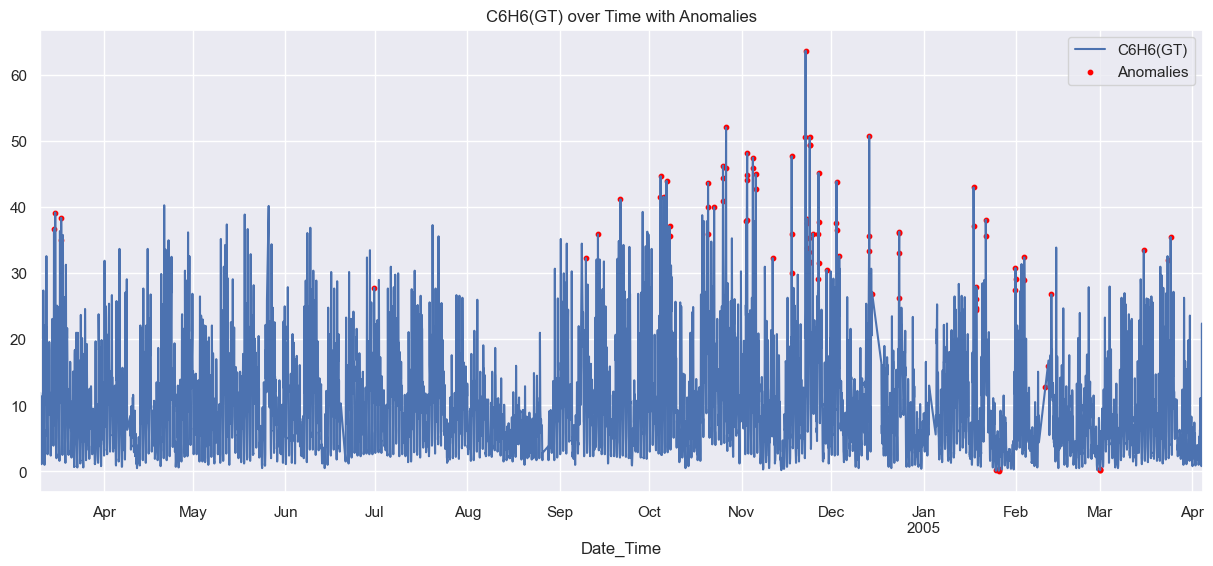

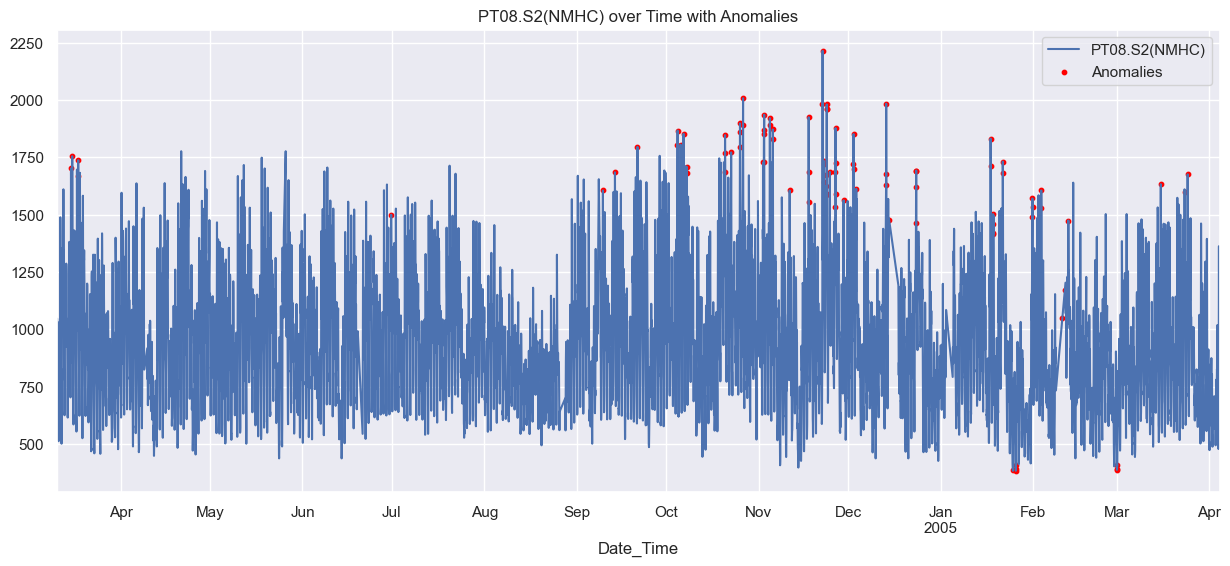

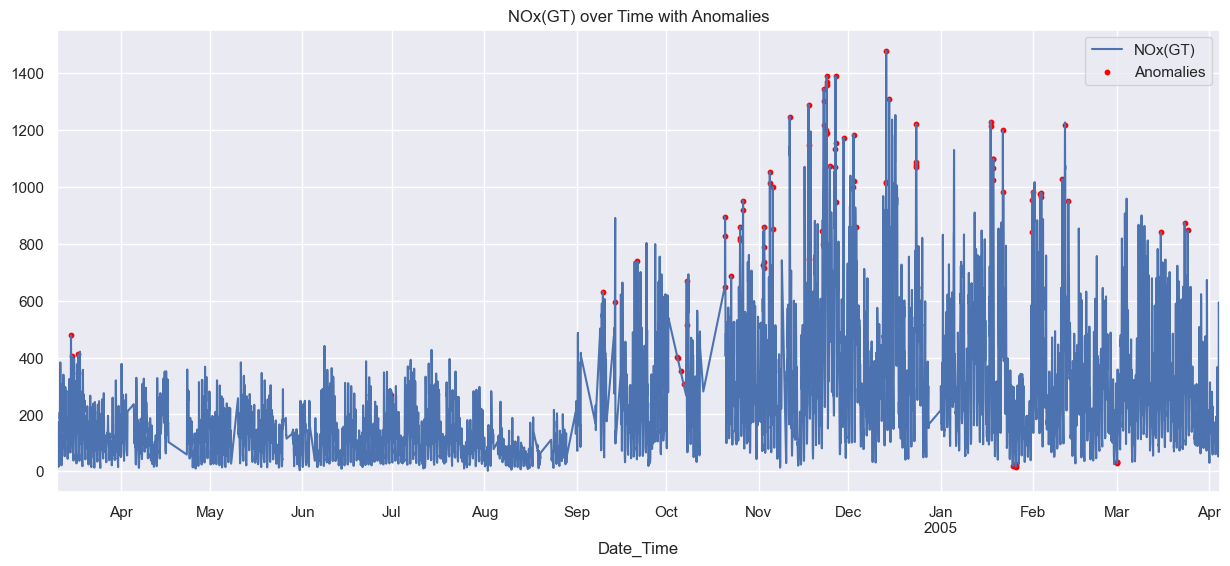

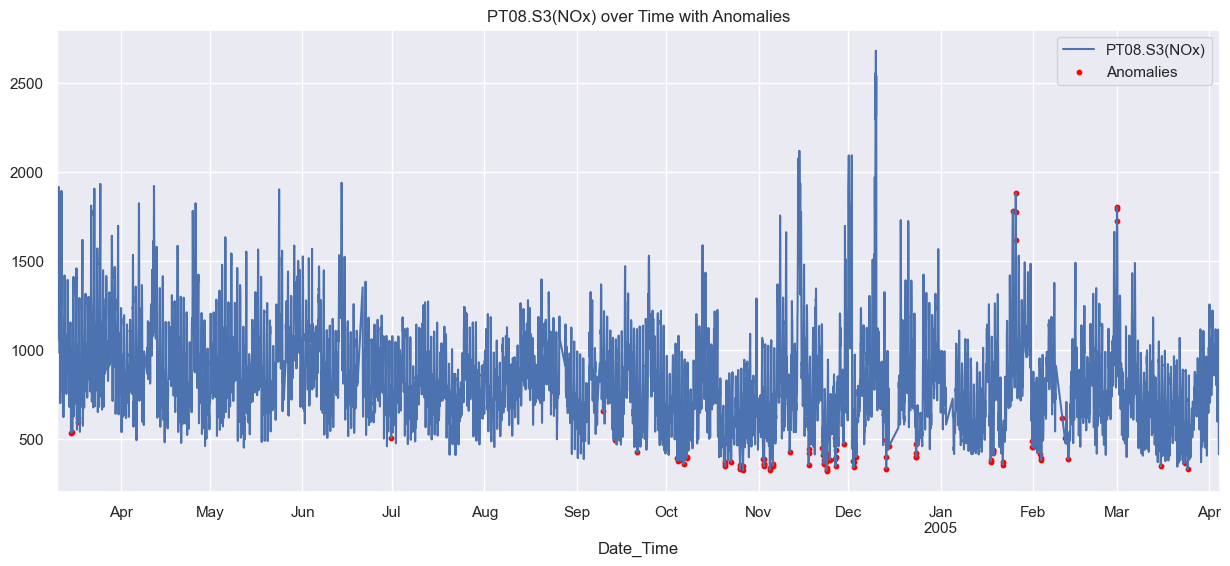

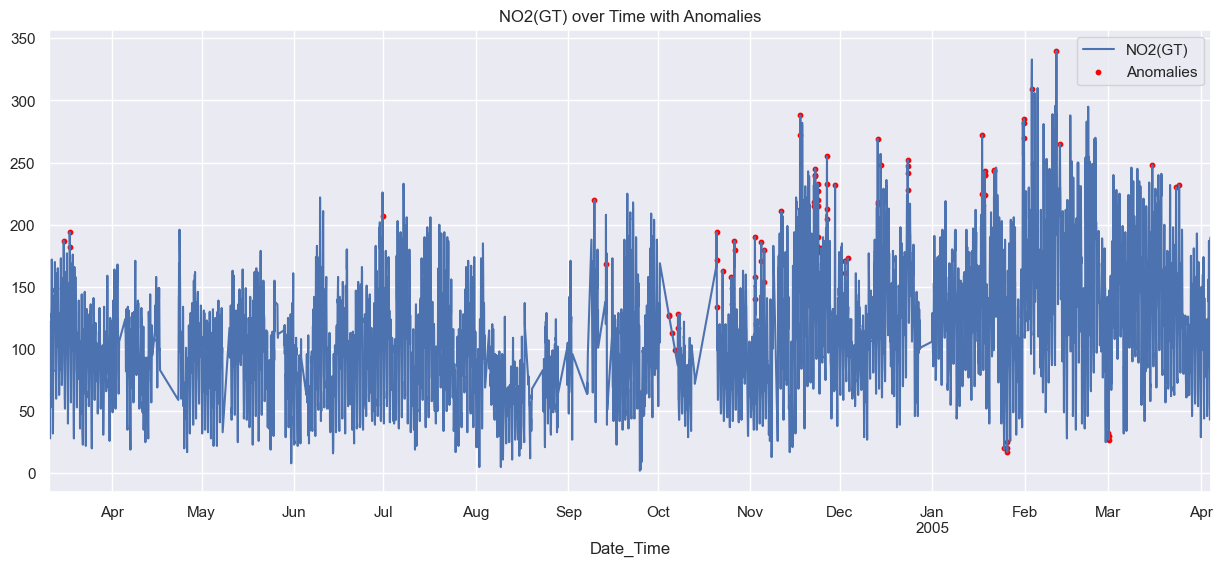

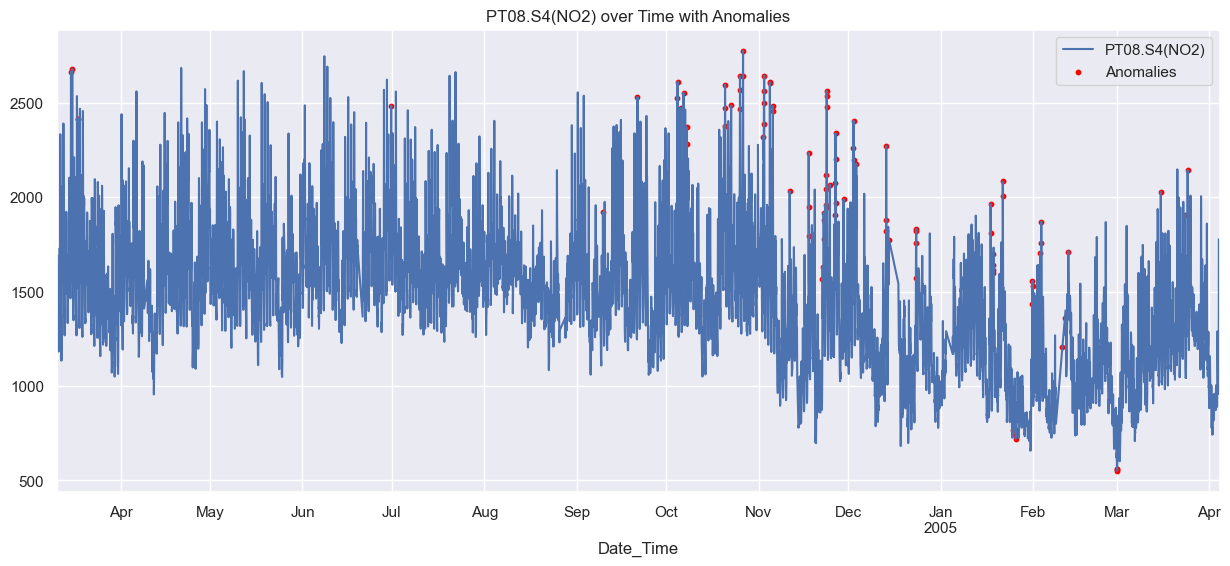

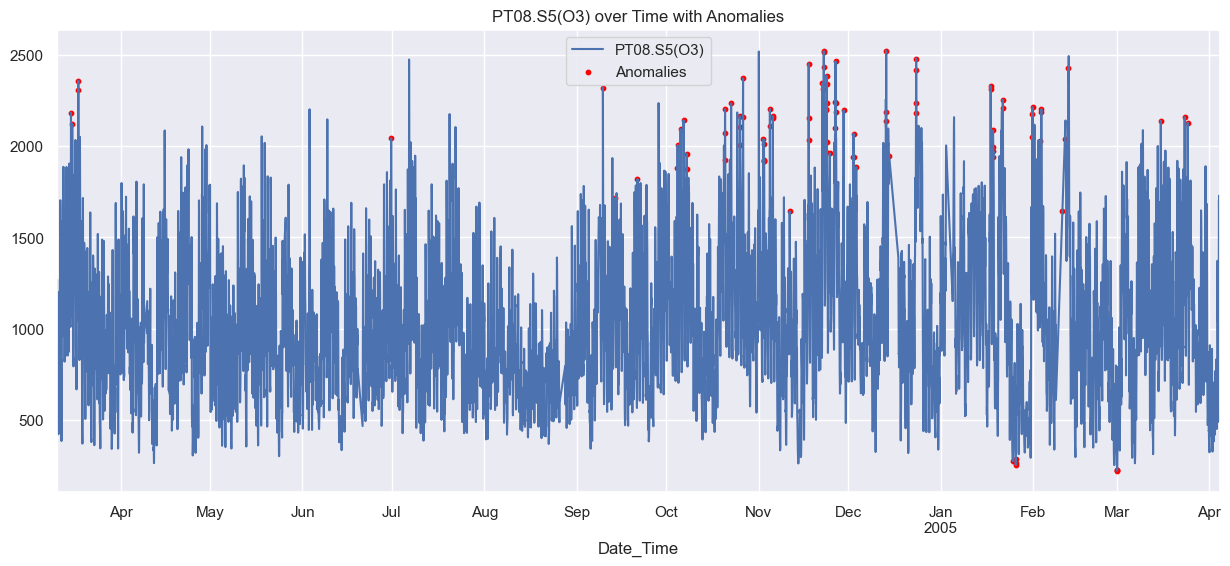

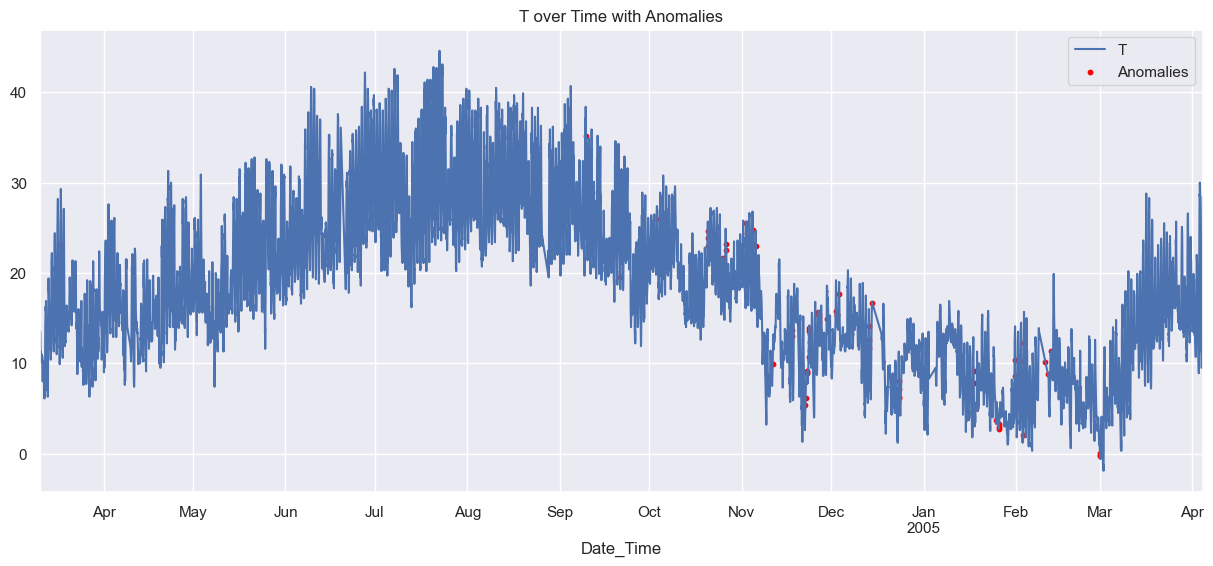

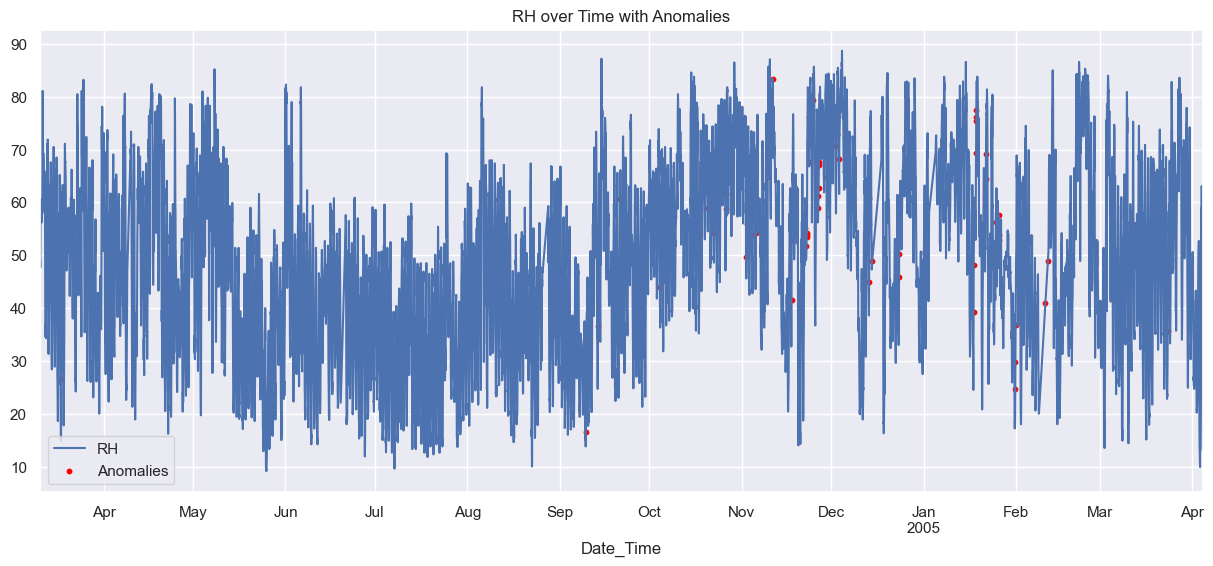

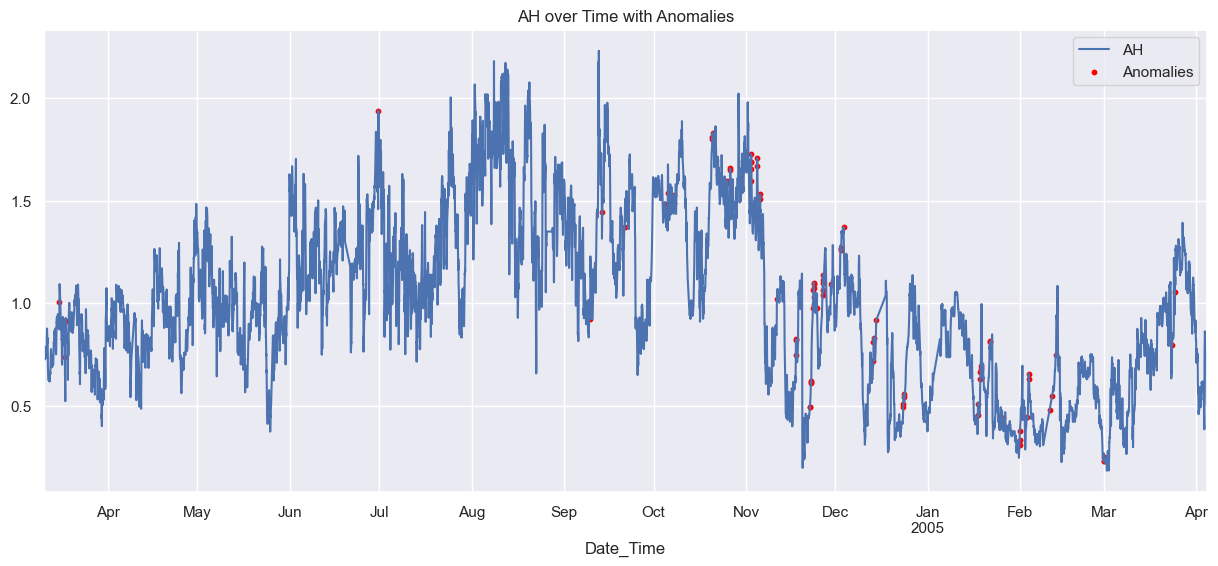

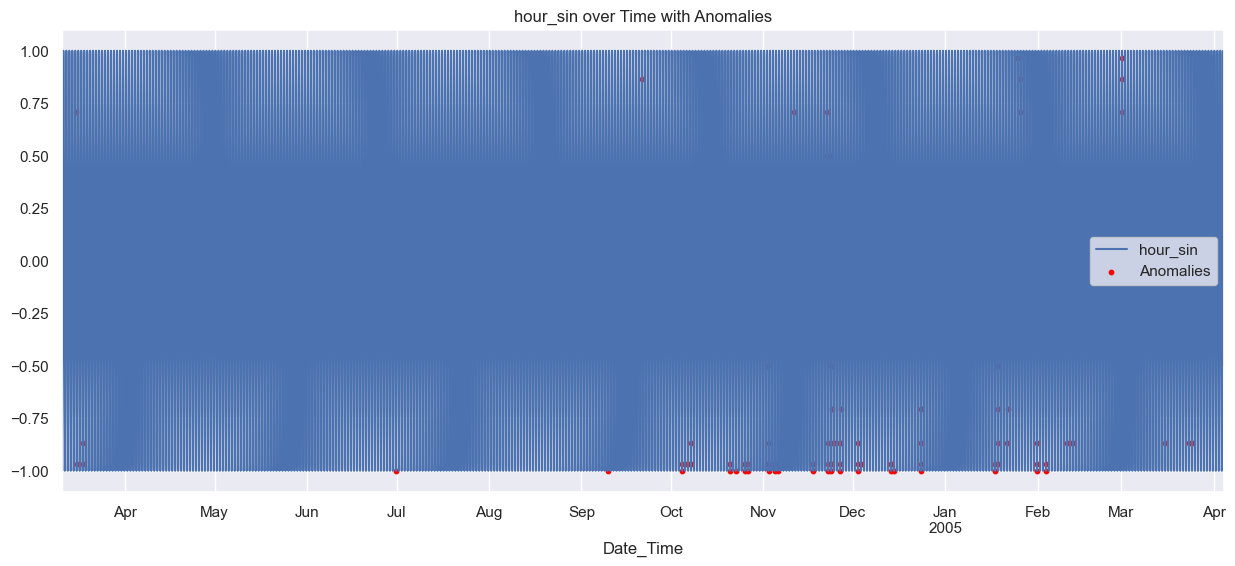

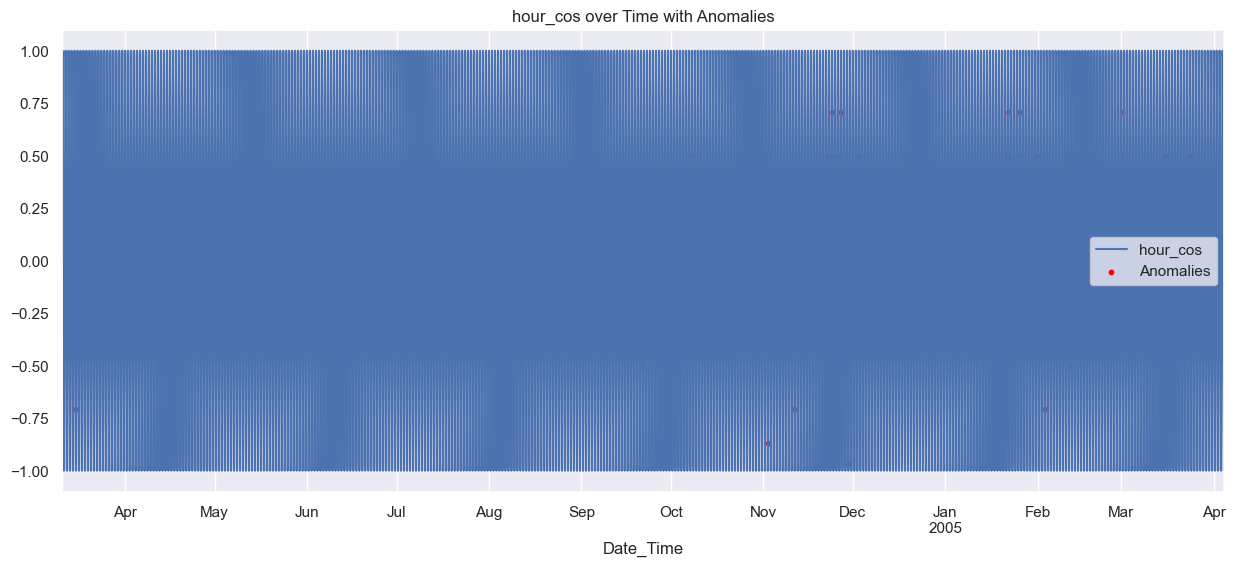

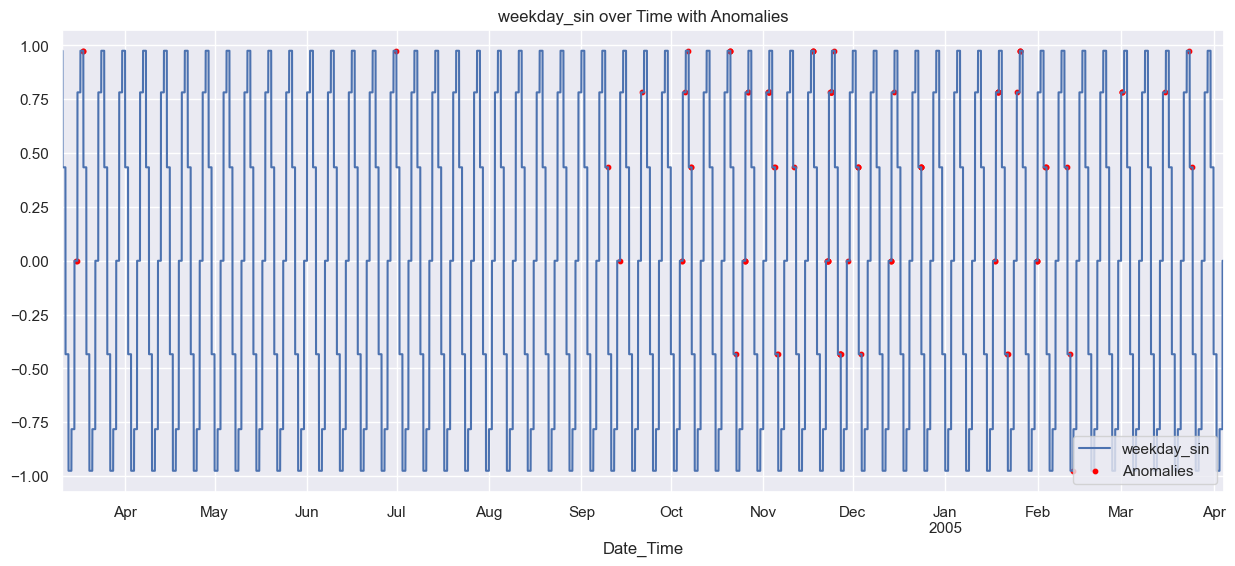

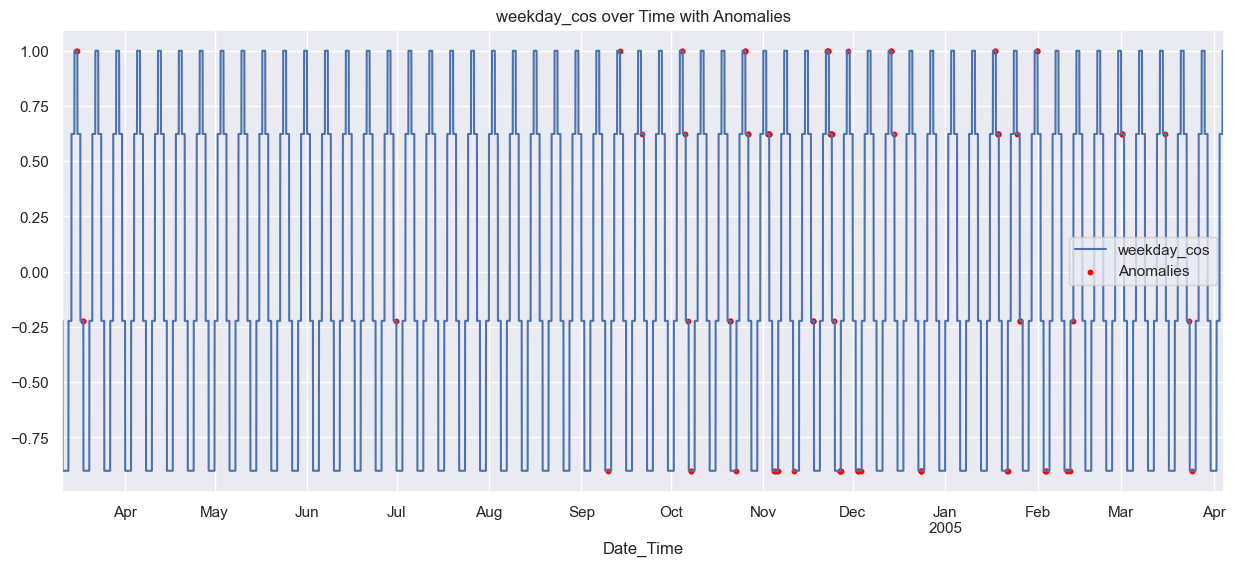

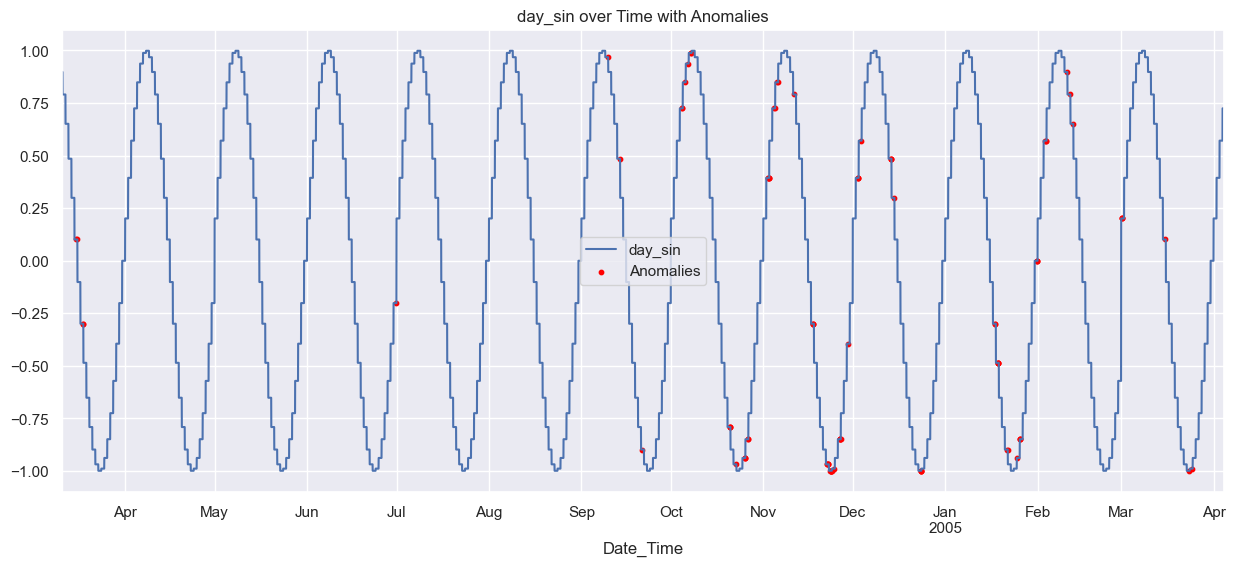

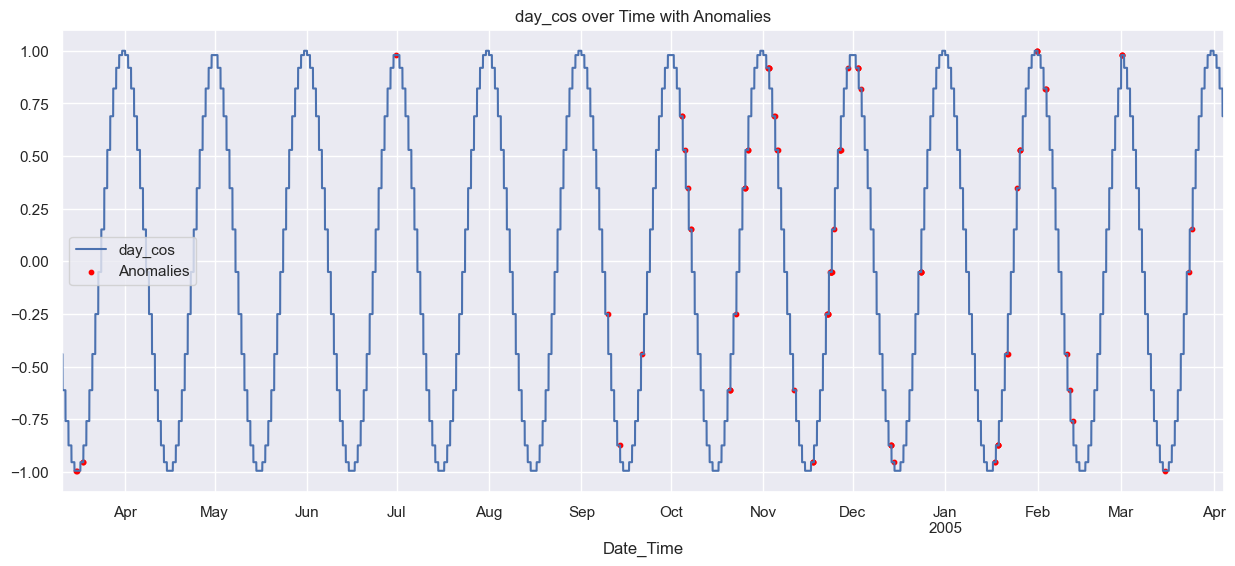

In [28]:
# Ensure Date_Time is in datetime format for proper plotting
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# Set the theme and figure size for Seaborn
sns.set_theme(rc={'figure.figsize': (15, 6)})

for feature in df.columns:
    if feature not in ['Date_Time', 'Hour', 'Day', 'weekday', 'Anomaly', 'Anomaly_Score']:
        plt.figure()
        df.plot(x='Date_Time', y=feature, ax=plt.gca())
        anomalies = df[df['Anomaly'] == -1]
        plt.scatter(anomalies['Date_Time'].values, anomalies[feature].values, color='red', label='Anomalies', s=10)
        plt.title(f'{feature} over Time with Anomalies')
        plt.legend()
        plt.show()